### Сборный Проект — Исследование данных индустрии компьютерных игровых консолей.

#### О проекте:
Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

###### Цель: 
Выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Доступны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

##### Описание данных:

•	Name — название игры\
•	Platform — платформа\
•	Year_of_Release — год выпуска\
•	Genre — жанр игры\
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)\
•	EU_sales — продажи в Европе (миллионы проданных копий)\
•	JP_sales — продажи в Японии (миллионы проданных копий)\
•	Other_sales — продажи в других странах (миллионы проданных копий)\
•	Critic_Score — оценка критиков (максимум 100)\
•	User_Score — оценка пользователей (максимум 10)\
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


#### Шаг 1. Загрузка данных

In [13]:
#Импортирую библиотеки:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats as st

In [14]:
#Импортирую данные и вывожу информацию о данных:

try:
    data = pd.read_csv("C:\\Users\Ahsas\\Desktop\\task4\\course_fin_proj\\games.csv")

except:
    data = pd.read_csv('/datasets/games.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
print()

print('Загружено строк:', len(data), 'из 16715 в исходном файле.')
data.head(3)


Загружено строк: 16715 из 16715 в исходном файле.


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


#### Шаг 1. Загрузка данных - выводы:

1. Исходный файл games.csv содержит 16716 записей.\
        Открыть его полностью не удалось из-за ошибки. Применен метод on_bad_lines='skip'\
  
2. Наименования столбцов содержат заглавные буквы. Переименовать.

3. Присутствуют пропущенные значения в следующих колонках:
     - 2   Name - удалить, т.к. нечем заменить\
     - 2  Genre - удалены всместе со строками с пустым name\
     - 267   Year_of_Release - восстановить (возможно, по имени)
     - 8496   Critic_Score
     - 6625   User_Score - 6 623 пустых строк, в 2416 случаях использованно  значение - tbd - to be decided;\
     - 22  Rating;          16584 non-null  object 
4. Изменить тип данных для колонок:Year_of_Release, user_score, critic_score.

#### Шаг 2. Предобработка данных

In [16]:
# Переименую названия колонок:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [17]:
# Удалю строки с пропущенным name (2 строчки)
data=data.dropna(subset=['name'])
len(data)

16713

In [18]:
print('Строк с пустым genre:', data.query('genre.isna()')['genre'].count())
print('Строк с пустым name:', data.query('name.isna()')['name'].count())

Строк с пустым genre: 0
Строк с пустым name: 0


In [19]:
# Выведу сводную таблицу для параметра user_score, 
# чтобы просмотреть использованные значения:
data['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [20]:
# заменю пустые значения user_score на значение NaN,
# т.к. нет основы для восстановления этих данных и число их велико. 
data['user_score']=data['user_score'].replace({'tbd':np.NaN})
print('Строк с пустым user_score:', data['user_score'].isna().sum())

Строк с пустым user_score: 9123


Использованное значение tbd - с анг. To be Decided - по сути является отложенным на потом решение о рейтинге, предполагаю, не несет смысловой нагрузкки, приравнено к отсутствию рейтинга. Поэтому заменяем на Nan.

In [21]:
# Выведу сводную таблицу для параметра critic_score чтобы просмотреть использованные значения:
print(data['critic_score'].value_counts())
data['critic_score'].isna().sum()

critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64


8576

In [22]:
# заменю пустые значения critic_score, если такие есть, 
# на значение NaN, т.к. нет оснновы для восстановления этих данных и число их велико. 

print('Строк с пустым critic_score:', data['critic_score'].isna().sum())
data.query('critic_score.isna()').tail(5)

Строк с пустым critic_score: 8576


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [23]:
print('Всего строк в данных:',len(data))
# удалю строки с пустыми значениями year_of_release, их число незначительное:
print('Пустых year_of_release:', data['year_of_release'].isna().sum())
data.query('year_of_release.isna()').head(3)

Всего строк в данных: 16713
Пустых year_of_release: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+


In [24]:
# Проверю число пустых значений year_of_release:
print('Число пустых значений year_of_release:', data['year_of_release'].isna().sum())
      
# Удалю их, т.к. немного:
data=data.dropna(subset=['year_of_release'])

print('Всего строк в данных:',len(data))

Число пустых значений year_of_release: 269
Всего строк в данных: 16444


In [25]:
# Проверю наличие очевидных дублей:
print(data.duplicated().sum())
data.head()

0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [26]:
# удалю неявные дубли:
data=data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

print('Всего строк в данных:',len(data))
# удалена одна запись.

Всего строк в данных: 16443


In [27]:
# проверю на предмет возможности заменить тип данных - critic_score:
data.groupby('critic_score')['critic_score'].count()
# В колонке присутствуют только целые числа. Можно преобразовать тип на Int.

critic_score
13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    36
95.0    16
96.0    18
97.0    11
98.0     4
Name: critic_score, Length: 81, dtype: int64

In [28]:
# проверю на предмет возможности заменить тип данных - user_score:
data.groupby('user_score')['user_score'].count()
# В колонке присутствуют только дробные числа. Можно преобразовать тип на float.


user_score
0       1
0.2     2
0.3     2
0.5     2
0.6     2
       ..
9.3    31
9.4    11
9.5     5
9.6     2
9.7     1
Name: user_score, Length: 95, dtype: int64

In [29]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [30]:
# Изменю тип данных для 3х параметров:
data = data.astype({'user_score': 'float64', 'year_of_release':'Int64' })

# Проверка смены типа:
data[['critic_score', 'user_score','rating', 'year_of_release']].info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   critic_score     7982 non-null   float64
 1   user_score       7462 non-null   float64
 2   rating           9767 non-null   object 
 3   year_of_release  16443 non-null  Int64  
dtypes: Int64(1), float64(2), object(1)
memory usage: 658.4+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [31]:
#Файл после предобработки сохраняю в новую переменную data2:
data2=data
data2.info()
data2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [32]:
# Создам дополнительную колонку суммирующую продажи игры во всех регионах - total_sales, по заданию:
data2['total_sales']= data2['na_sales']+data2['eu_sales']+data2['jp_sales']+data2['other_sales']

print(len(data2))
data2.head(3)

16443


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


## 2. Предобработка - выводы:

После преобразований в датафрейме games.csv осталось 16714 записей.

 - удалены 2 пустые строки с name и genre;
 - явных дублей не выявлено;
 - удалена 1 строчка неявных дублей:
 - переименованы заголовки столбцов;
 - пустые строки в колонках critic_score, user_score, rating сохранены, из-за знаимого количества и невозможности восстановить эти данные;)
 - в случае со значение tbd - to be decided в user_score - заменено на NaN для простоты последующей работы с данынм.
 - восстановлен year_of_release для 146 записей. Остальные 119 удалены;
 - преобразован тип данных для critic_score' - Int64, 'year_of_release' -Int64, 'user_score' -float64;
 - создан новый параметр - сумма продаж игр во всех регионах -total_sales.
 - удалена одна запись неявных дублей.
 - пустые rating заменены на not_rated
  
 Пропуски остались только в 2х параметрах - critic_score, user_score. Все три, предположительно, выставляются пользователем, что не было сделано в 100% случаев. Т.к. оценка индивидуальная, восстановить ее не представляется возможным.

#### Шаг 3. Исследовательский анализ данных

### Вопрос 1:
•	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [33]:
print(data2['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


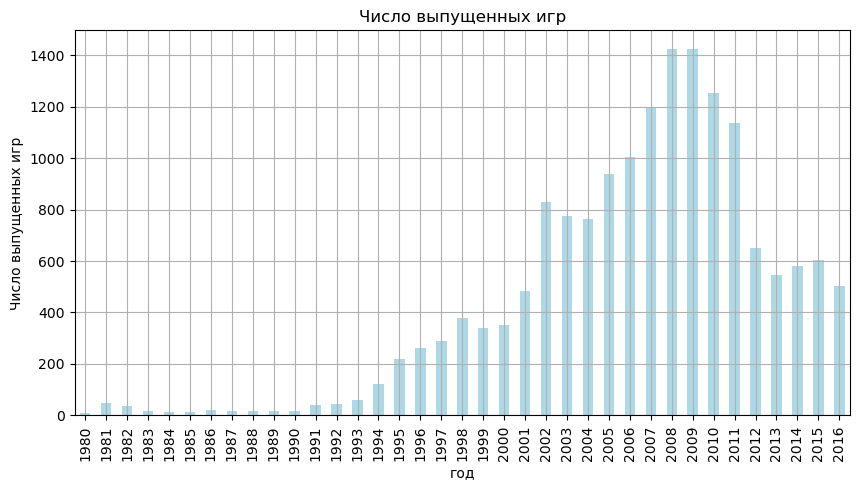

,number
count,37.000000
mean,444.405405
std,451.591535
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


In [34]:
# Проанализирую разброс по годам:

release_byyear=data2.pivot_table(index='year_of_release', values='name', aggfunc=('count'))
release_byyear.columns=['number']
release_byyear.sort_values('year_of_release', ascending=True).plot(kind='bar', title='Число выпущенных игр',grid=True, color='lightblue',figsize=(10,5),legend=False);

plt.xlabel('год')
plt.ylabel('Число выпущенных игр')
plt.show()
release_byyear.describe()


,number
year_of_release,
1993,60
1994,121
1995,219
1996,263
1997,289
1998,379
1999,338
2000,350
2001,482


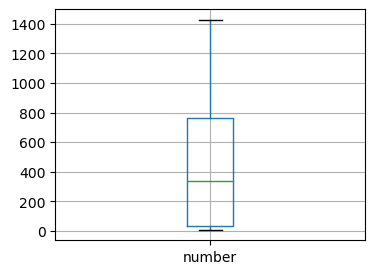

In [35]:
release_byyear.boxplot(column='number', figsize=(4,3));
release_byyear.loc[release_byyear['number']>=50].head(10)

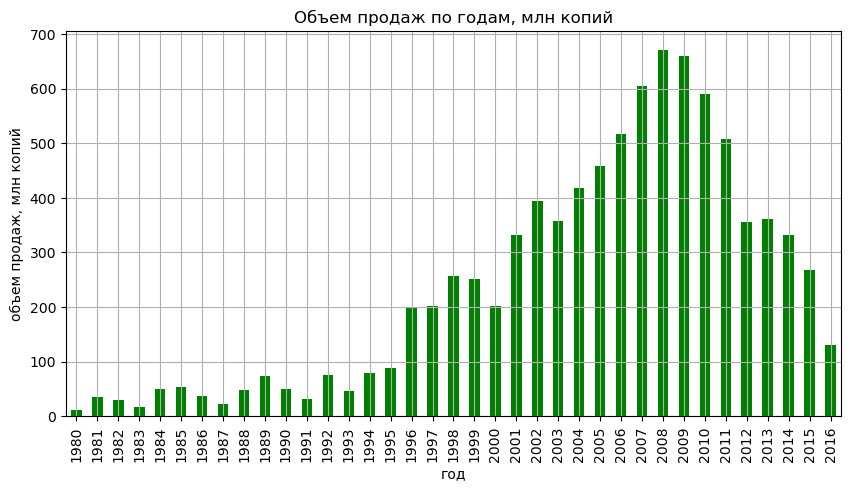

       total_sales
count    37.000000
mean    238.225946
std     207.596891
min      11.380000
25%      49.370000
50%     201.070000
75%     361.240000
max     671.500000


,total_sales
year_of_release,
2012,355.83
2013,361.24
2014,331.53
2015,267.98
2016,129.94


In [36]:
# Оценю продажи во всех регионах по годам, чтобы установить порог значимости:
t_sales_byyear=data2.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))
t_sales_byyear.columns=['total_sales']
t_sales_byyear.plot(kind='bar',grid=True, color='green',title= 'Объем продаж по годам, млн копий',figsize=(10,5),legend=False);
plt.xlabel('год')
plt.ylabel('объем продаж, млн копий')
plt.show()

print(t_sales_byyear.describe())
t_sales_byyear.tail()

### Вывод:
- Данные c 43 до 751 по числу выпущенных игр находятся в 2-3 квартилях, но значения до 1996 г. минимальны на всем отрезке c 1980 до 1995 включительно - до 100 млн. копий.
- Также, при анализе данных об объеме продаж в сумме по всем регионам видно, что объем проданных копий до 1996 года несопоставим с данными, например с начала нулевых годов и далее. 
- Начиная с 1996 года, начался трехкратный рост, бум развития индустрии.
- Кроме того, это - начало другой эпохи\поколения игр. 

Т.о., считаю, следует отбросить года до 1996. Анализирую период с 1996 года и далее.

#### Следует отметить, что начавшийся рост популярности, продаж на представленных платформах, продолжался вплоть до 2009 года, достигнув 650 млн копий в 2008-2009 годах. Начиная с 2010 года наступил период резкого спада популярности темпани около 18% в год, за исключением 2013 года, где был всплеск интереса (+ 15% rr), и достиг 124 млн копий к 2016 году.

### Вопрос 2:
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Продажи наиболее популярных платформ, млн копий:
          top8_total_sales
platform                  
PS2                1233.56
X360                961.24
PS3                 931.33
Wii                 891.18
DS                  802.78
PS                  727.58
PS4                 314.14
GBA                 312.88


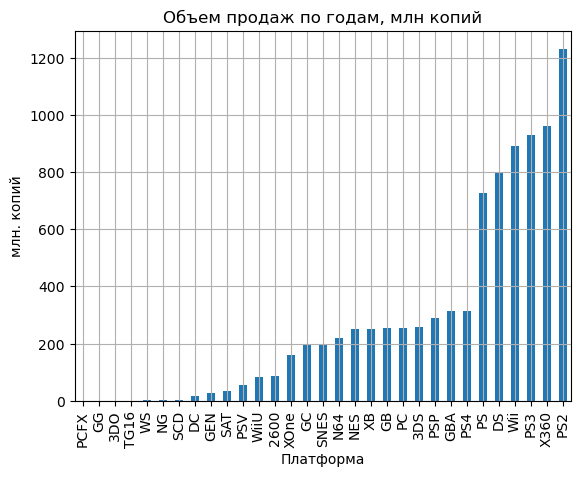

In [37]:
# Проанализирую объемы продаж по платформам во всех регионах. Сохраню список в переменную sales_platform:
sales_platform=data2.groupby('platform').agg({'total_sales': sum}).sort_values('total_sales',ascending=False)
sales_platform.columns=['top8_total_sales']
top8_sales_platform=sales_platform.nlargest(columns=['top8_total_sales'], n=8)

# Введу техническую характеристику для выделения наиболее популярных платформ, уроверь ~400 млн копий:
sales_platform= sales_platform.sort_values('top8_total_sales', ascending=True).plot(y='top8_total_sales', title= 'Объем продаж по годам, млн копий', grid=True,legend=False, kind='bar')
plt.ylabel('млн. копий')
plt.xlabel('Платформа')
print('Продажи наиболее популярных платформ, млн копий:')
print(top8_sales_platform);



In [148]:
# Введу техническую хар-ку для выделения ТОП-8 платформ по объему продаж во всех регионах:
data2['top_platform']=data2['platform'].where(data['platform'].isin(top8_sales_platform.index), 'другие')
print('Число строк в исходном датафрейме):', len(data2))
data2.head(3)

Число строк в исходном датафрейме): 16443


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,top_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,другие
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Wii


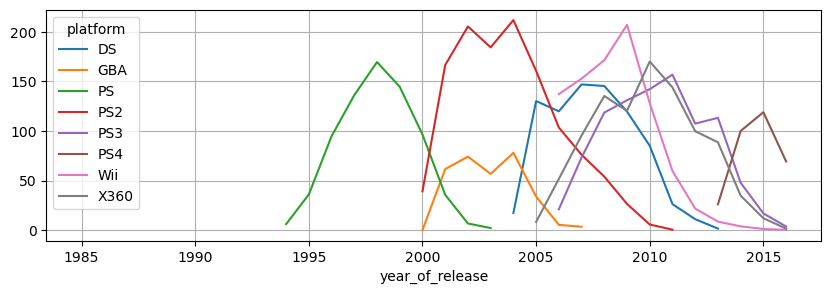

In [146]:
# Проаналиирую жизненный цикл продаж восьми самых популярных платформ:
top_platform= data2.loc[data2['top_platform']!='другие']
top_platform_grouped=top_platform.groupby(['platform','year_of_release']).agg({'total_sales': sum}).reset_index()
top_platform_grouped.columns=['platform','year_of_release','total_sales']
top_platform_pivot = top_platform_grouped.pivot(index='year_of_release', columns='platform', values='total_sales')
top_platform_pivot.plot(grid=True, figsize=(10,3));

Вывод:
			
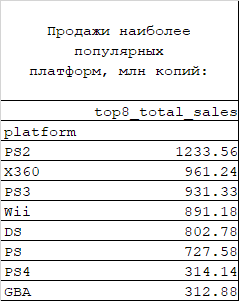

Из диаграммы выше видно, что, на примере самых популярных платформ (8 из 31 платформы в исходных данных), средний интервал между выпуском новой платформы - примерно 6 лет. Срок жизни платформы - примерно 10 лет, до полного угасания продаж.

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. 

Число строк в датафейме с 2013 года (актуальный период): 2233


,total_sales
platform,
3DS,42.92
PC,13.77
PS3,20.42
PS4,188.15
PSP,0.12
PSV,10.50
Wii,1.32
WiiU,20.95
X360,13.48


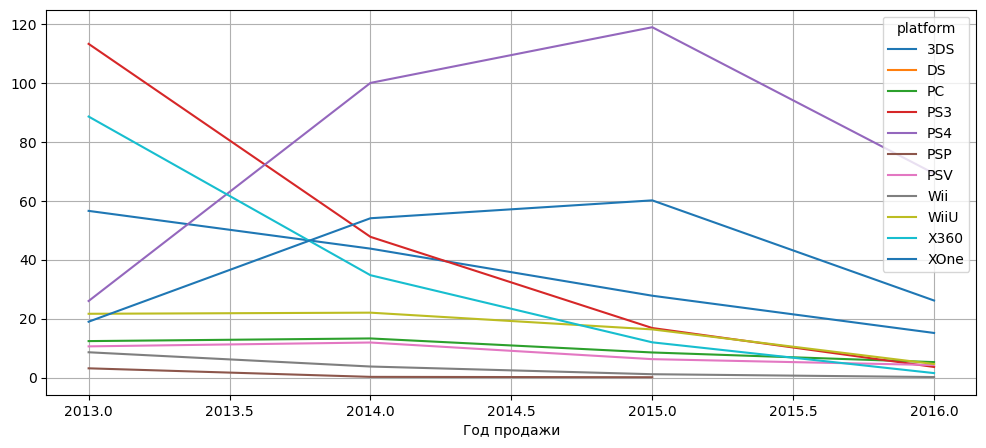

In [40]:
# Выделю данные актульного периода в переменную act_period:
act_period=data2.loc[data2['year_of_release']>=2013]
print('Число строк в датафейме с 2013 года (актуальный период):', len(act_period))
act_period_sales=act_period.groupby(['platform','year_of_release']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=False).reset_index()
act_period_sales.columns=['platform','year_of_release','total_sales']
act_period_sales_pivot = act_period_sales.pivot(index='year_of_release', columns='platform', values='total_sales')
act_period_sales_pivot.plot(grid=True, figsize=(12,5))
plt.xlabel('Год продажи')
act_period_sales.loc[act_period_sales['year_of_release']>=2015].groupby('platform').agg({'total_sales': 'sum'})


### Вопрос 4: 
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

#### Вывод 4: 

Несомненными лидерами по продажам в период с 2000 по 2010 годы были PS2 (1242 млн копий) и его ближайший конкурент X360 (964 млн копий). PS3, вышедшая следом, и долгое время ( с 2004 по 2011) конкурировавшая с предшественницей предыдущего поколения - на третьем месте - 933 млн копий за весь наблюдаемый период продаж. 
Wii, достигшая в моменте в период 2008 -2009 годах лидерских позиций с продажами около 200 млн. копий, на 4м месте по суммарным продажам -901 млн копий во всех регионах.
Все платформы пережили резкий взлет популярности и спад до минимальных объемов продаж на итоговой стадии жизненного цикла. 
Набравшая популярность в 2015 году PS4, как и PS3 сформировали нисходящую тенденцию по показателю пика продаж и никогда не достигли уровня PS2.

Все платформы, включая PS4, переживают спад, падение продаж или уход с рынка. 
В 2016 году действующими игрокоми остаются: 

Платформа: Продажи в 2016, млн копий:
- PS4 - 	188.15
- XOne - 	86.29
- 3DS - 42.92
- PS3 - 	20.42 
- WiiU - 20.95
- X360 - 	13.48 
- PC -  13.77
- PSV - 	10.50


### Вопрос 5: 
•	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.\
•	Соотнесите выводы с продажами игр на других платформах.

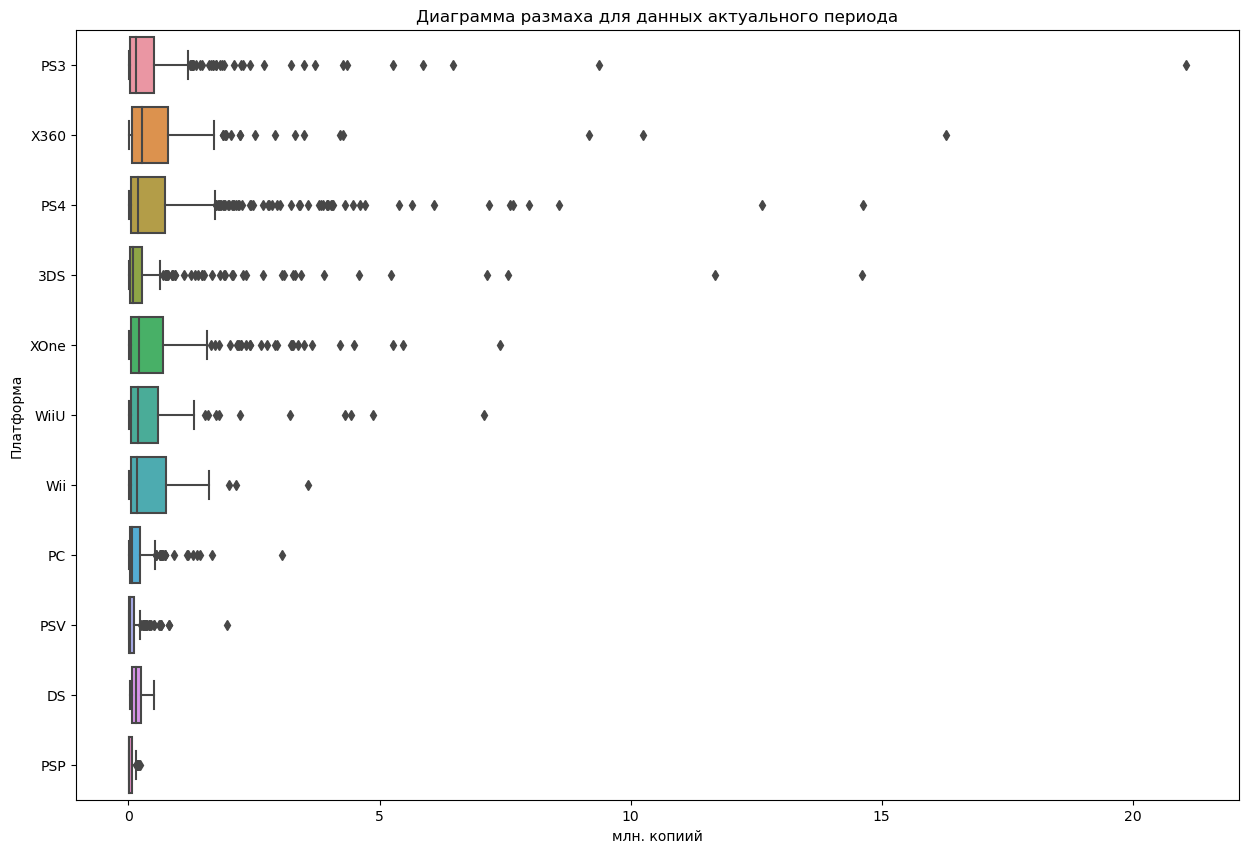

In [41]:
# Построю диаграмму размаха для всех данных ограниченного последними годами продаж:
box=act_period[['platform', 'total_sales', 'year_of_release']]
plt.figure(figsize=(15,10))
sns.boxplot(x='total_sales', y='platform', data=box.reset_index())
box.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=('sum'))
plt.title('Диаграмма размаха для данных актуального периода')
plt.xlabel('млн. копиий')
plt.ylabel('Платформа')
plt.show()

#### Вывод 5: 
В рассматриваемом отрезке, с 2013 по 2016, PS4,PS3, PS4, x360,XOne, Wiiu, Wii, 3DS можно считать наиболее успешными проектами.

Продажи прочих практически сходят на нет к 2016 году.

Максимальных уровней продаж за трехлетний период, среди прочих активных на рынке,достигали PS3, X360, PS4,3DS. Но и их результаты на историческом минимуме.

Платформы SNES, SAT, NG и ряд прочих практически не завоевали коммерческого успеха.


### Вопрос 6: 
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [42]:
# Построю матрицу корреляции для платформы PS4:
corr_PS4=act_period.loc[data2['platform']=='PS4']
corr_PS4=corr_PS4.dropna(subset=['critic_score','user_score'])[['critic_score', 'user_score','total_sales']]

corr_PS4с=corr_PS4.corr()
corr_PS4с

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


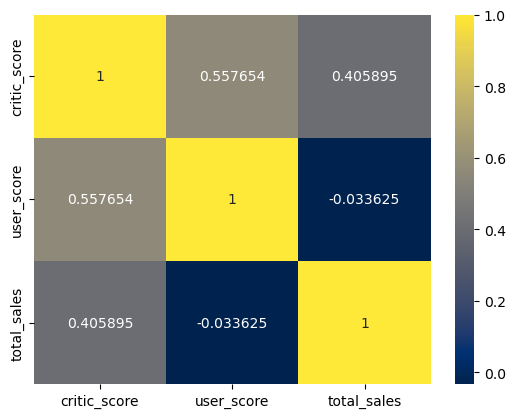

In [43]:
# Построю тепловую карту на основе матрицы корреляции:
sns.heatmap(corr_PS4с, annot=True, fmt="g", cmap='cividis');

Диаграмма рассеяния для PS4 - зависимость продаж от рейтинга:

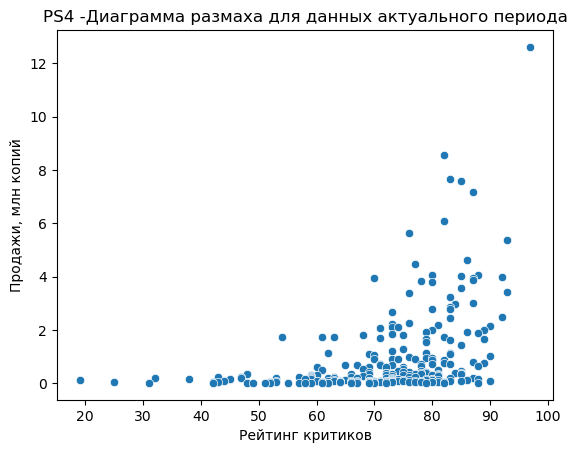

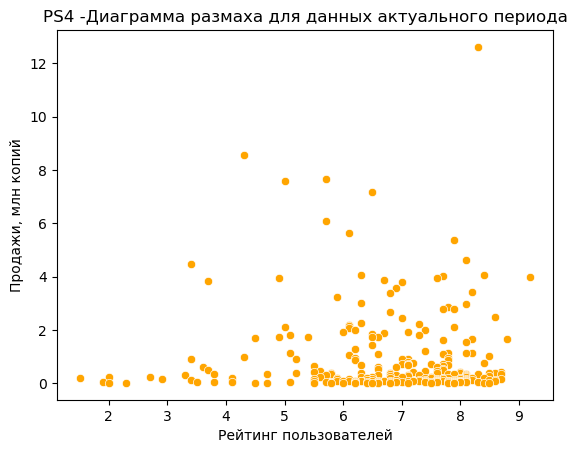

In [54]:
sns.scatterplot(data=corr_PS4, x='critic_score', y='total_sales');
figsize=(5,5)
plt.title('PS4 -Диаграмма размаха для данных актуального периода')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи, млн копий')
plt.show()

sns.scatterplot(data=corr_PS4, x='user_score', y='total_sales', color='orange');
figsize=(5,5)
plt.title('PS4 -Диаграмма размаха для данных актуального периода')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи, млн копий')
plt.show()

 Диаграмма рассеяния для X360 - зависимость продаж от рейтинга:

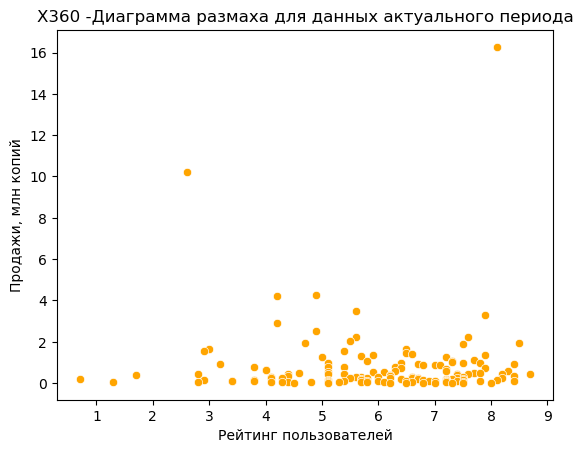

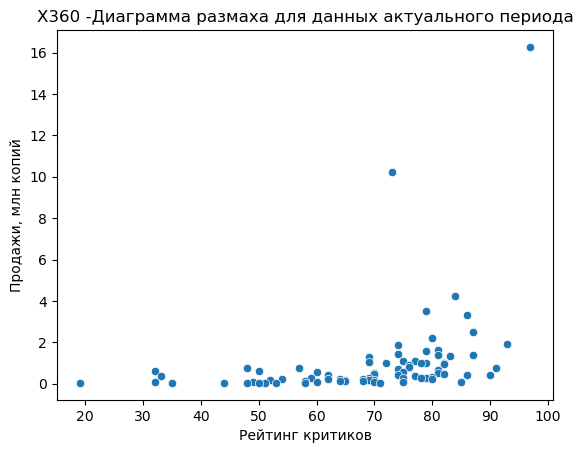

In [53]:
corr_X360=act_period.loc[data2['platform']=='X360']
sns.scatterplot(data=corr_X360, x='user_score', y='total_sales',color='orange');
figsize=(5,5)
plt.title('X360 -Диаграмма размаха для данных актуального периода')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи, млн копий')
plt.show()

sns.scatterplot(data=corr_X360, x='critic_score', y='total_sales');
figsize=(5,5)
plt.title('X360 -Диаграмма размаха для данных актуального периода')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи, млн копий')
plt.show()

 Диаграмма рассеяния для PS3 - зависимость продаж от рейтинга:

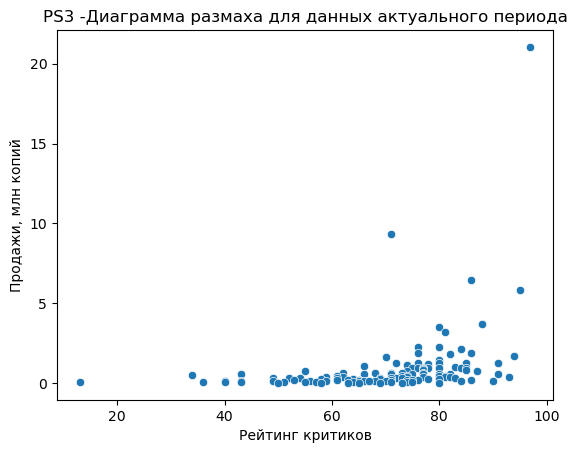

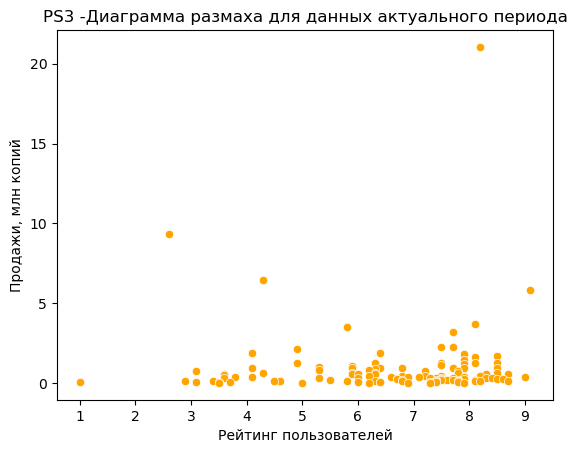

In [55]:
corr_PS3=act_period.loc[data2['platform']=='PS3']
corr_PS3=corr_PS3.dropna(subset=['critic_score','user_score'])[['critic_score', 'user_score','total_sales']];
plt.title('PS3 -Диаграмма размаха для данных актуального периода')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи, млн копий')
sns.scatterplot(data=corr_PS3, x='critic_score', y='total_sales');
plt.show()

sns.scatterplot(data=corr_PS3, x='user_score', y='total_sales',color='orange');
plt.xlabel('Рейтинг пользователей')
plt.title('PS3 -Диаграмма размаха для данных актуального периода')
plt.ylabel('Продажи, млн копий')
plt.ylabel('Продажи, млн копий', rotation=90)
plt.show()

#### Вывод 6:
На матрице рассеяния и тепловой карте, построенных для платформы PS4, видна незначительная прямая корреляция уровня продаж от оценки критиков - 0.4, еще менее значимая обратная зависимость от оценки полььзователей - 0.033.
Видна также прямая корреляция между оценками пользователей и критиков с коэффициентом 0.56.

Диаграммы рассеяния для трех платформ (PS4, PS3, X360) показывают примерно одинаковое расспределение продаж в зависимости от оценки критиков и пользователей. 
Оценки критиков зачастую выше, оценок пользователей.

### Вопрос 7: 
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [56]:
# Рейтинг жанров:
rating=act_period.groupby(['genre']).agg({'total_sales': 'median'}).sort_values('total_sales', ascending=False).reset_index()
rating.head()

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125


In [57]:
# Наименее популярные жанры:
rating.tail()

,genre,total_sales
7,Simulation,0.10
8,Misc,0.10
9,Strategy,0.08
10,Puzzle,0.06
11,Adventure,0.03


In [106]:
# Сгруппирую данные по двум критериям: жанр игры и платформа:
genre_info=act_period.groupby(['genre', 'platform']).agg({'total_sales': 'median'}).sort_values('total_sales', ascending=True).reset_index()

genre_pivoted=genre_info.pivot(index='genre', columns='platform', values='total_sales')

genre_pivoted['total']=genre_pivoted[['3DS','DS','PC','PS3','PS4','PSP','PSV','Wii', 'WiiU','X360', 'XOne']].sum(axis=1)
genre_pivoted.columns=['3DS','DS','PC','PS3','PS4','PSP','PSV','Wii', 'WiiU','X360', 'XOne', 'total']
genre_pivoted.sort_values('total', ascending=True)

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total
genre,,,,,,,,,,,,
Puzzle,0.100,NaN,NaN,0.040,0.020,NaN,0.03,NaN,0.060,NaN,NaN,0.250
Adventure,0.060,0.030,0.030,0.050,0.070,0.020,0.02,0.180,0.070,0.075,0.060,0.665
Misc,0.080,0.080,0.020,0.110,0.075,0.020,0.06,0.230,0.190,0.310,0.180,1.355
Action,0.070,0.250,0.060,0.165,0.155,0.055,0.04,0.035,0.140,0.250,0.150,1.370
Simulation,0.060,0.210,0.100,0.080,0.210,NaN,0.01,0.140,0.200,0.225,0.160,1.395
Fighting,0.080,NaN,0.050,0.130,0.170,0.020,0.10,NaN,0.600,0.220,0.200,1.570
Strategy,0.060,NaN,0.105,0.130,0.080,0.020,0.05,0.260,0.610,0.280,0.170,1.765
Role-Playing,0.175,NaN,0.090,0.120,0.200,0.130,0.07,NaN,0.410,0.490,0.320,2.005
Sports,0.185,0.030,0.060,0.260,0.525,0.170,0.07,0.380,0.440,0.430,0.335,2.885


In [108]:
#genre_pivoted1=genre_pivoted.drop('total', axis=1, inplace=True)
#genre_pivoted

5 наиболее популярных жанров:
          genre  total_sales
0       Shooter        0.450
1        Sports        0.240
2      Platform        0.225
3  Role-Playing        0.125
4      Fighting        0.125

5 наименее популярных жанров:
         genre  total_sales
7   Simulation         0.10
8         Misc         0.10
9     Strategy         0.08
10      Puzzle         0.06
11   Adventure         0.03


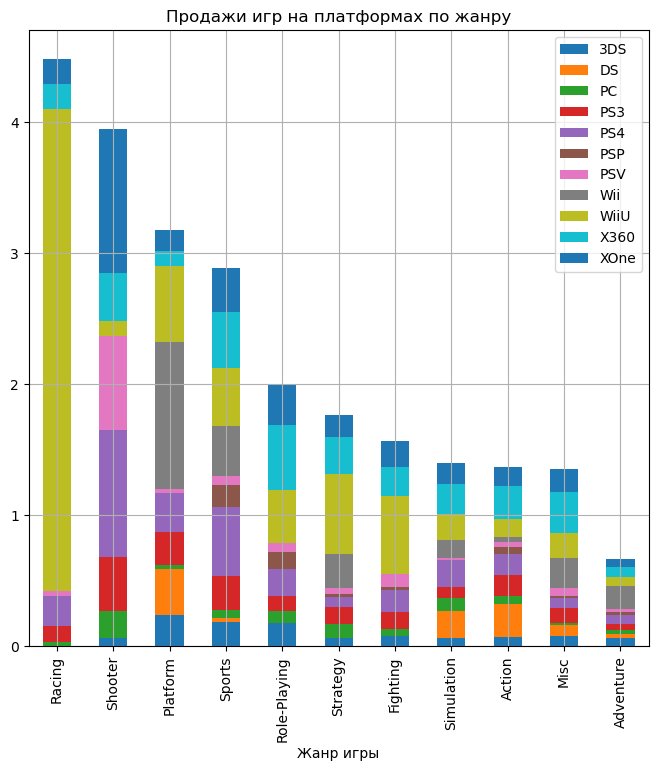

In [115]:
genre_pivoted=genre_pivoted[['3DS','DS','PC','PS3','PS4','PSP','PSV','Wii', 'WiiU','X360', 'XOne']]
genre_pivoted.reindex(['Racing', 'Shooter',  'Platform', 'Sports', 'Role-Playing', \
                       'Strategy', 'Fighting', 'Simulation', 'Action', 'Misc', 'Adventure']).plot.bar(stacked=True, grid=True,figsize=(8, 8), title='Продажи игр на платформах по жанру')
plt.xlabel('Жанр игры')

print('5 наиболее популярных жанров:')
print(rating.head())
print()
print('5 наименее популярных жанров:')
print(rating.tail())

#### Вывод 7:
Исходя из медианных значений уровня продаж игр по жанрам в лидерах игры следующих жанров (млн. копий):
	
- Shooter	0.450
- Sports	0.240
- Platform	0.225
- Role-Playing	0.125
- Fighting	0.125
Наименее популярные жанры: Simulation, Misc	, Strategy, Puzzle, Adventure.

Платформы - лидеры в жанрах:\
WiiU - игры жанра Racing\
Wii - Platform\
PS4 и XOne- Sports and Shooter\
X360 - Shooter, Sport, Stratefy



### Шаг 4. Составьте портрет пользователя каждого региона:


#### Вопрос 8: 
Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.
•	Самые популярные жанры (топ-5). Поясните разницу.
•	Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [116]:
# Сгруппирую данные по платформе для анализа продаж по регионам:
region_info=act_period.groupby(['platform']).agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', \
        'total_sales': 'sum'}).nlargest(columns=['total_sales'], n=5)\
        .sort_values('total_sales', ascending=True).reset_index()
region_info

,platform,na_sales,eu_sales,jp_sales,total_sales
0,X360,81.66,42.52,0.51,136.80
1,3DS,38.20,30.96,67.81,143.25
2,XOne,93.12,51.59,0.34,159.32
3,PS3,63.50,67.81,23.35,181.43
4,PS4,108.74,141.09,15.96,314.14


In [119]:
# Сгруппрую данные о продажах по жанрам:
region_info_genre=act_period.groupby(['genre']).agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum','total_sales': 'sum'}).sort_values('total_sales', ascending=True).reset_index()
region_info_genre=region_info_genre[['genre','na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
region_info_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genre        12 non-null     object 
 1   na_sales     12 non-null     float64
 2   eu_sales     12 non-null     float64
 3   jp_sales     12 non-null     float64
 4   total_sales  12 non-null     float64
dtypes: float64(4), object(1)
memory usage: 612.0+ bytes


In [120]:
# Установлю ороговые значения, для отображения не более 5 секторов на диаграмме:
thresholdall = 60.0
thresholdj = 6.01
thresholdeu = 20.17
thresholdna = 25.0
#df = df.assign(Percentage = lambda x: (x['Total_Marks'] /500 * 100))
# Выделю жанры, которые будут объеденены в 6й сектор:
region_info_genre['total_sales_grn'] = region_info_genre['total_sales'].apply(lambda val:'x' if val >= thresholdall  else f'Другие <{thresholdall} млн. копий')
region_info_genre['jp_sales_grn'] = region_info_genre['jp_sales'].apply(lambda val:'x'  if val >= thresholdj else f'Другие < {thresholdj} млн. копий')
region_info_genre['na_sales_grn'] = region_info_genre['na_sales'].apply(lambda val:'x'  if val >= thresholdna else f'Другие < {thresholdna} млн. копий')
region_info_genre['eu_sales_grn'] = region_info_genre['eu_sales'].apply(lambda val: 'x' if val >= thresholdeu else f'Другие < {thresholdeu} млн. копий')
region_info_genre.tail(3)

,genre,na_sales,eu_sales,jp_sales,total_sales,total_sales_grn,jp_sales_grn,na_sales_grn,eu_sales_grn
9,Sports,65.27,60.52,5.41,150.65,x,Другие < 6.01 млн. копий,x,x
10,Shooter,109.74,87.86,6.61,232.98,x,x,x,x
11,Action,126.05,118.13,40.49,321.87,x,x,x,x


In [121]:
# Восстановлю описание жанров в группирующей колонке для топ-5 на уровне региона:
region_info_genre.loc[region_info_genre['na_sales_grn'] == 'x','na_sales_grn']= region_info_genre['genre']
region_info_genre.loc[region_info_genre['eu_sales_grn'] == 'x','eu_sales_grn']= region_info_genre['genre']
region_info_genre.loc[region_info_genre['jp_sales_grn'] == 'x','jp_sales_grn']= region_info_genre['genre']
region_info_genre.loc[region_info_genre['total_sales_grn'] == 'x','total_sales_grn']= region_info_genre['genre']
region_info_genre.tail(3)

,genre,na_sales,eu_sales,jp_sales,total_sales,total_sales_grn,jp_sales_grn,na_sales_grn,eu_sales_grn
9,Sports,65.27,60.52,5.41,150.65,Sports,Другие < 6.01 млн. копий,Sports,Sports
10,Shooter,109.74,87.86,6.61,232.98,Shooter,Shooter,Shooter,Shooter
11,Action,126.05,118.13,40.49,321.87,Action,Action,Action,Action


In [122]:
# Рассчитаю сумму продаж на уровне региона для категорий, входящих в арегированнный сектор - Другие:
pie_total1=region_info_genre.loc[region_info_genre['total_sales'] < thresholdall, 'total_sales'].sum()
pie_total1=float(pie_total1)
pie_total2=region_info_genre.loc[region_info_genre['eu_sales'] < thresholdeu, 'eu_sales'].sum()
pie_total2=float(pie_total2)
pie_total3=region_info_genre.loc[region_info_genre['na_sales'] < thresholdna, 'na_sales'].sum()
pie_total3=float(pie_total3)
pie_total4=region_info_genre.loc[region_info_genre['jp_sales'] < thresholdj, 'jp_sales'].sum()
pie_total4=float(pie_total4)
print(pie_total1,pie_total2, pie_total3, pie_total4)

176.48000000000002 68.56 62.76 25.79


In [143]:
# Восстановлю значение продаж на уровне жанра и региона:
def pie1(row):
    cvalue=row['total_sales']
    if float (cvalue) > thresholdall:
        return cvalue
    else:
        return pie_total1
region_info_genre['all_sales_gr']=region_info_genre.apply(pie1, axis=1)
region_info_genre.loc[region_info_genre['total_sales_grn']=='x','total_sales_grn']= region_info_genre['genre']

def pie2(row):
    cvalue1=row['eu_sales']
    if float (cvalue1) > thresholdeu:
        return cvalue1
    else:
        return pie_total2
region_info_genre['eu_sales_gr']=region_info_genre.apply(pie2, axis=1)
region_info_genre.loc[region_info_genre['eu_sales_gr']=='x','eu_sales_gr']= region_info_genre['genre']

region_info_genre

def pie3(row):
    cvalue2=row['na_sales']
    if float (cvalue2) > thresholdna:
        return cvalue2
    else:
        return pie_total3
region_info_genre['na_sales_gr']=region_info_genre.apply(pie3, axis=1)
region_info_genre.loc[region_info_genre['na_sales_gr']=='x','na_sales_gr']= region_info_genre['genre']

region_info_genre

def pie4(row):
    cvalue3=row['jp_sales']
    if float (cvalue3) > thresholdj:
        return cvalue3
    else:
        return pie_total4
region_info_genre['jp_sales_gr']=region_info_genre.apply(pie4, axis=1)
region_info_genre.loc[region_info_genre['jp_sales']=='x','jp_sales_gr']= region_info_genre['genre']

region_info_genre.tail()


,genre,na_sales,eu_sales,jp_sales,total_sales,total_sales_grn,jp_sales_grn,na_sales_grn,eu_sales_grn,all_sales_gr,eu_sales_gr,na_sales_gr,jp_sales_gr
7,Misc,27.49,20.04,9.20,62.82,Misc,Misc,Misc,Другие < 20.17 млн. копий,62.82,68.56,27.49,9.20
8,Role-Playing,46.40,36.97,51.04,145.89,Role-Playing,Role-Playing,Role-Playing,Role-Playing,145.89,36.97,46.40,51.04
9,Sports,65.27,60.52,5.41,150.65,Sports,Другие < 6.01 млн. копий,Sports,Sports,150.65,60.52,65.27,25.79
10,Shooter,109.74,87.86,6.61,232.98,Shooter,Shooter,Shooter,Shooter,232.98,87.86,109.74,6.61
11,Action,126.05,118.13,40.49,321.87,Action,Action,Action,Action,321.87,118.13,126.05,40.49


In [142]:
# Выделю таблицы для построения графиков:
pie_tab_all=(region_info_genre[['total_sales_grn', 'all_sales_gr']]).drop_duplicates()
pie_tab_eu=(region_info_genre[['eu_sales_grn', 'eu_sales_gr']]).drop_duplicates()
pie_tab_na=(region_info_genre[['na_sales_grn', 'na_sales_gr']]).drop_duplicates()
pie_tab_jp=(region_info_genre[['jp_sales_grn', 'jp_sales_gr']]).drop_duplicates()

            total_sales_grn  all_sales_gr
11                   Action        321.87
10                  Shooter        232.98
0   Другие <60.0 млн. копий        176.48
9                    Sports        150.65
8              Role-Playing        145.89
7                      Misc         62.82




<Figure size 640x480 with 0 Axes>

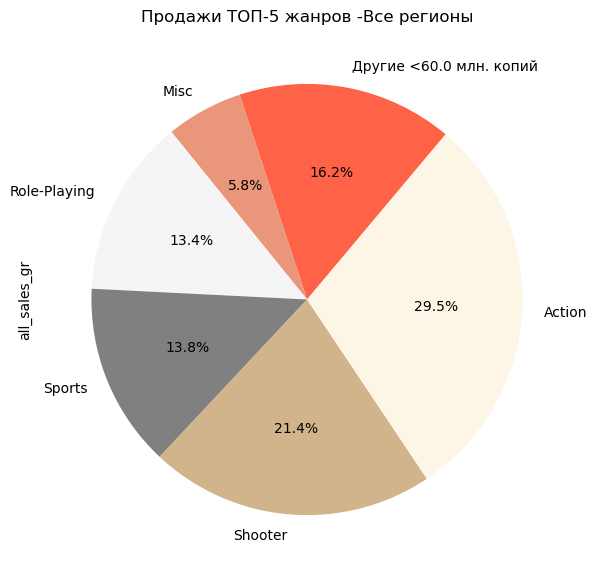

In [125]:
# Диаграммы по жанрам и регионам:
pie_colors=['tomato','darksalmon', 'whitesmoke', 'grey', 'tan', 'oldlace','palegreen','darkgreen',\
            'darkseagreen', 'olive','lightblue', 'green','palegoldenrod', 'maroon','rosybrown', \
            'olive','lightgreen', 'orange','lightgrey'];

plt.tight_layout();
pie_tab_all.plot(title='Продажи ТОП-5 жанров -Все регионы',\
                          kind='pie', pctdistance=.6, autopct='%1.1f%%',\
                          y='all_sales_gr',figsize=(7,7), startangle=50, labels=pie_tab_all['total_sales_grn'], labeldistance=1.1, legend=False, colors=pie_colors);
print(pie_tab_all.sort_values('all_sales_gr', ascending=False));
print()
print()

                 eu_sales_grn  eu_sales_gr
11                     Action       118.13
10                    Shooter        87.86
0   Другие < 20.17 млн. копий        68.56
9                      Sports        60.52
8                Role-Playing        36.97
5                      Racing        20.19




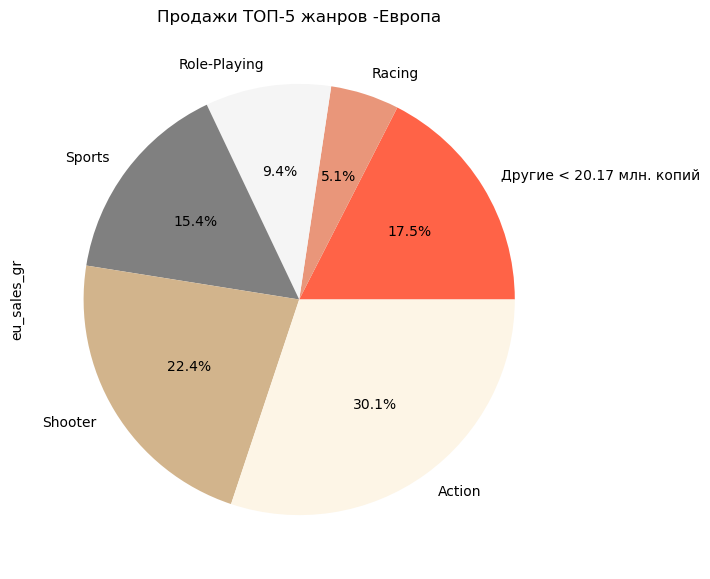

In [126]:
pie_tab_eu.plot(title='Продажи ТОП-5 жанров -Европа',\
                          kind='pie', pctdistance=.6, autopct='%1.1f%%',\
                          y='eu_sales_gr',figsize=(7,7), labels=pie_tab_eu['eu_sales_grn'], labeldistance=1.1, legend=False, colors=pie_colors);
print(pie_tab_eu.sort_values('eu_sales_gr', ascending=False))
print()
print()

                na_sales_grn  na_sales_gr
11                    Action       126.05
10                   Shooter       109.74
9                     Sports        65.27
0   Другие < 25.0 млн. копий        62.76
8               Role-Playing        46.40
7                       Misc        27.49




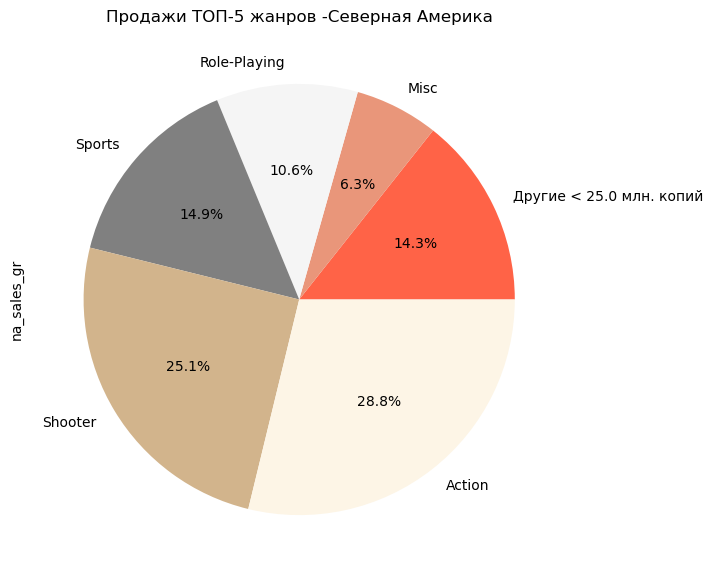

In [127]:
pie_tab_na.plot(title='Продажи ТОП-5 жанров -Северная Америка',\
                          kind='pie', pctdistance=.6, autopct='%1.1f%%',\
                          y='na_sales_gr',figsize=(7,7), labels=pie_tab_na['na_sales_grn'], labeldistance=1.1, legend=False, colors=pie_colors);
print(pie_tab_na.sort_values('na_sales_gr', ascending=False));
print()
print()


                jp_sales_grn  jp_sales_gr
8               Role-Playing        51.04
11                    Action        40.49
0   Другие < 6.01 млн. копий        25.79
7                       Misc         9.20
4                   Fighting         7.65
10                   Shooter         6.61


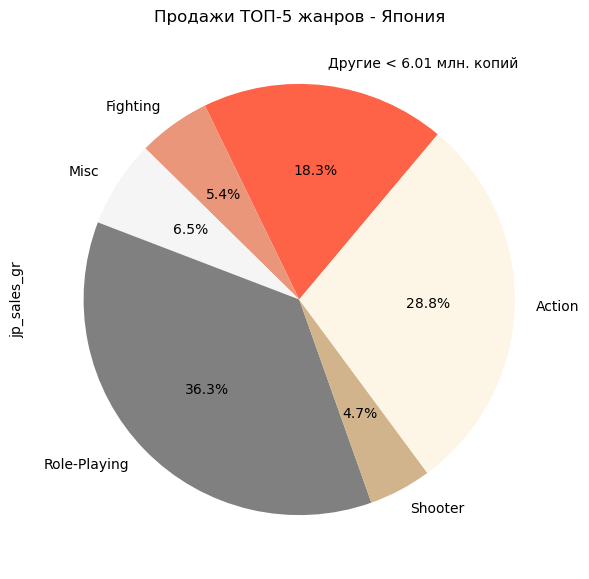

In [128]:
pie_tab_jp.plot(title='Продажи ТОП-5 жанров - Япония',\
                          kind='pie', pctdistance=.6, autopct='%1.1f%%',\
                          y='jp_sales_gr',figsize=(7,7), startangle=50,labels=pie_tab_jp['jp_sales_grn'], labeldistance=1.1, legend=False, colors=pie_colors);
print()
print(pie_tab_jp.sort_values('jp_sales_gr', ascending=False));

In [141]:
act_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,top_platform
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,PS3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,X360
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,PS4
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,другие
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,PS4


### Шаг 4.  Выводы

Самые популярные 5 жанров по регионам (по мере убывания): 
- 29.5% - Action, 
- 21,36% - Shooter, 
- 13.8% - Sports, 
- Role-Playing - 13.38%, 
- Misc - 5.76%.
Топ-5 в Северной Америке и Европе такие же. 

Япония отличается - максимально популярна Role-Playing - 36.26%, далее следует Action - 28.76%, Misc, Fighting, Shooter
____________________
Самые популярные 5 платформ по регионам (по мере убывания):29% - PS4, 16,6% - PS3, 14.6% - XOne, 3DS, X360.
Наиболее полулярны по регионам:
- PS4 в Северной Америке и Европе 
- 3DS в Японии

In [132]:
act_period['rating'].fillna('not_rated')

16               M
23               M
31       not_rated
33       not_rated
42               M
           ...    
16703    not_rated
16707    not_rated
16710    not_rated
16712    not_rated
16714    not_rated
Name: rating, Length: 2233, dtype: object

In [133]:
rating_plot=act_period.groupby(['rating']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=True)
print(act_period['rating'].value_counts())

rating
M       369
T       333
E       302
E10+    252
Name: count, dtype: int64


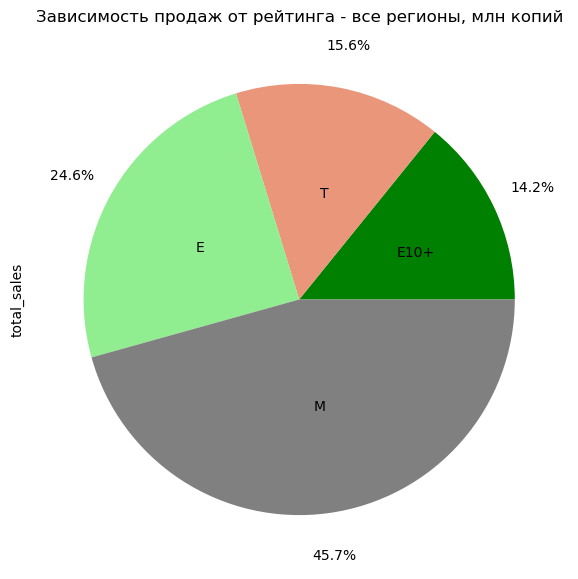

In [134]:
act_period
pie_colors=['green', 'darksalmon', 'lightgreen', 'grey', 'darkgreen', 'palegreen', 'darkseagreen', 'lightblue','tan','orange','lightgrey']
rating_plot=act_period.groupby(['rating']).agg({'total_sales': 'sum'}).sort_values('total_sales', ascending=True)
rating_plot.plot(title='Зависимость продаж от рейтинга - все регионы, млн копий',\
                          kind='pie', pctdistance=1.2, autopct='%1.1f%%',\
                          x='platform',y='total_sales',figsize=(7,7),labeldistance=.5, legend=False, colors=pie_colors);

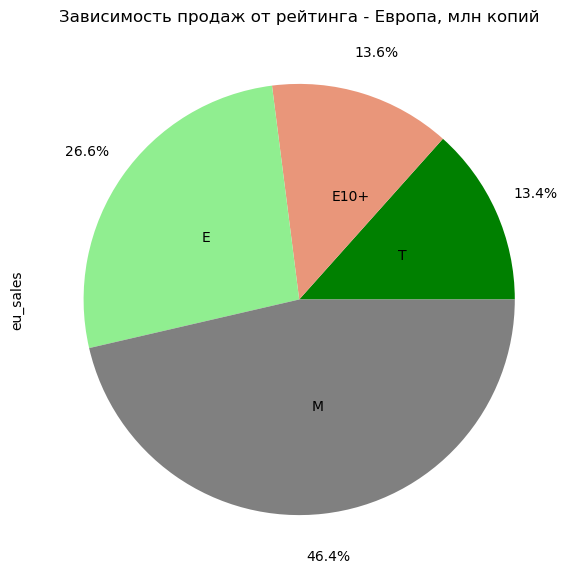

In [135]:
act_period

rating_plot=act_period.groupby(['rating']).agg({'eu_sales': 'sum'}).sort_values('eu_sales', ascending=True)
rating_plot.plot(title='Зависимость продаж от рейтинга - Европа, млн копий',\
                          kind='pie', pctdistance=1.2, autopct='%1.1f%%',\
                          x='platform',y='eu_sales',figsize=(7,7),labeldistance=.5, legend=False,colors=pie_colors);

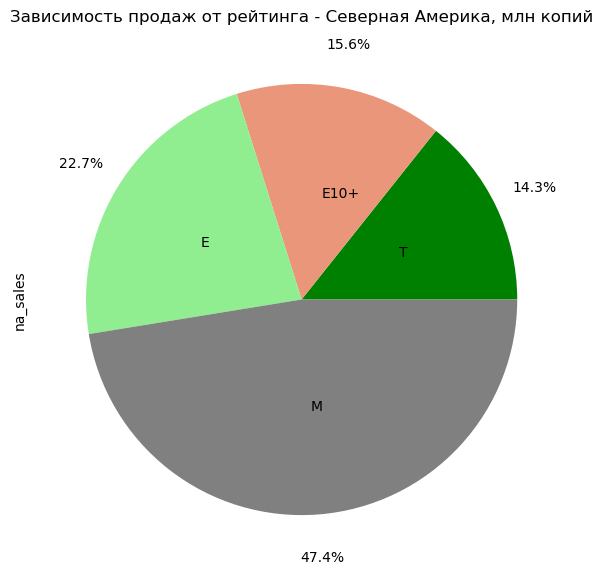

In [136]:
act_period

rating_plot=act_period.groupby(['rating']).agg({'na_sales': 'sum'}).sort_values('na_sales', ascending=True)
rating_plot.plot(title='Зависимость продаж от рейтинга - Северная Америка, млн копий',\
                          kind='pie', pctdistance=1.2, autopct='%1.1f%%',\
                          x='platform',y='na_sales',figsize=(7,7),labeldistance=.5, legend=False,colors=pie_colors);

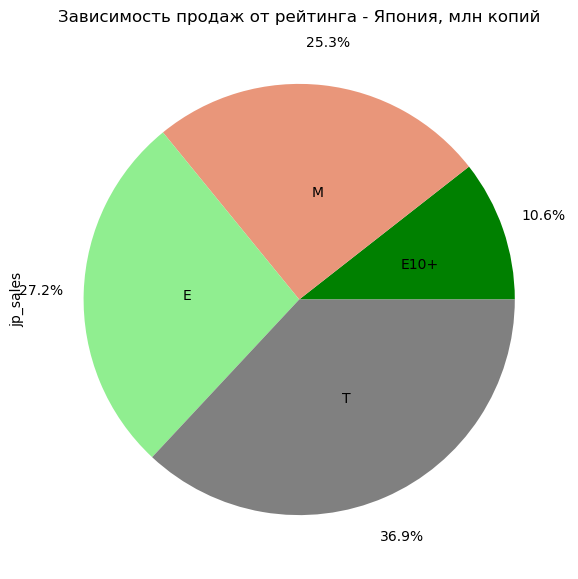

In [137]:
act_period

rating_plot=act_period.groupby(['rating']).agg({'jp_sales': 'sum'}).sort_values('jp_sales', ascending=True)
rating_plot.plot(title='Зависимость продаж от рейтинга - Япония, млн копий',\
                          kind='pie', pctdistance=1.2, autopct='%1.1f%%',\
                          x='platform',y='jp_sales',figsize=(7,7),labeldistance=.5, legend=False, colors=pie_colors);

#### Вывод:
Наибольшие объемы продаж, при анализе без разбивки по регионам, приходятся на игры с рейтингом ESRB: M и E, 45.7% и 24.6% соответственно, Т забирает 15.6%б E10+ - 14.2%.

В Северной Америке доминирует ESRB рейтинг М -47,4%. Е и Т составляют вместе 39.1 %, E10+ - оставшиеся 15.6%.

В Европе доминирует ESRB рейтинг М -46,4%. Е и Т составляют вместе 50%, E10+ - оставшиеся 13.6%.

В Японии доминирует ESRB рейтинг Т -36,9%. Е и М составляют вместе 52.5%, E10+ - оставшиеся 10.6%.
Т.о. опять видим единнобразие Северной Америки и Европы, в то время как Япония проявляет страновую специфику.


### Шаг 5. Проверьте гипотезы


#### Вопрос 9:
#### Задача 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Задайте самостоятельно пороговое значение alpha.
Поясните:
•	Как вы сформулировали нулевую и альтернативную гипотезы;
•	Какой критерий применили для проверки гипотез и почему.

In [139]:
# Просчитаю средние пользовательские рейтинги при помощи mean():
mean_user_scr=act_period.loc[data2['user_score'].notnull()].groupby('platform').agg({'user_score': 'mean'}).sort_values('user_score', ascending=True)

# создам множества для сравнения рейтингов пользователей PC и XOne: 
XOne=act_period[act_period['platform']=='XOne']['user_score'].dropna()
PC=act_period[act_period['platform']=='PC']['user_score'].dropna()
print('XOne средний пользовательский рейтинг:', XOne.describe())
print()
print('PC средний пользовательский рейтинг:', PC.describe())
XOne

XOne средний пользовательский рейтинг: count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

PC средний пользовательский рейтинг: count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

Гипотеза о равенстве среднего двух генеральных совокупностей: 

H0 - Нулевая гипотеза: средние значения пользовательских рейтингов платформ Xbox One и PC равны.

H1 - средние значения пользовательских рейтингов платформ Xbox One и PC не равны

In [140]:
#Использую метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей: 
#scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

alpha = 0.01
# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


#### Задача 1. Ответ:
p-значение: 0.14012658403611647
H0 - нулевая гипотеза не отвергнута -пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.\
H1 - средние значения пользовательских рейтингов платформ Xbox One и PC не равны опровергнута. 
Вероятность случайно получить такое или большее различие средних двух совокупностей равна 14%.

#### Вопрос 9:
#### Задача 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [ ]:
# Просчитаю средние пользовательские рейтинги при помощи mean():
mean_genre=act_period.loc[act_period['user_score'].notnull()].groupby('genre').agg({'user_score': 'mean'}).sort_values('user_score', ascending=True)

# создам множества для сравнения рейтингов любителей экшен и спортс: 
Action=act_period[act_period['genre']=='Action']['user_score'].dropna()
Sports=act_period[act_period['genre']=='Sports']['user_score'].dropna()
print('Action средний пользовательский рейтинг:', Action.describe())
print()
print('Sports средний пользовательский рейтинг:', Sports.describe())

H0 -Нулевая гипотеза: средние значения пользовательских рейтингов жанра экшен и спортс равны.

H1 Альтернативная гипотеза: среднее значение пользовательских рейтингов жанра экшен и спортс не равны.


In [ ]:
#Использую метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей: 
#scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

alpha = 0.05
# уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

#### Задача 2. Ответ:
p-значение: 1.0517832389140023e-27\
H0 -Нулевая гипотеза отвергнута.
Полученное p-value меньше заданного уровня. Есть основания говорить, что среднее значение пользовательских рейтингов жанра экшен больше, чем среднее значение у спортс.

### Итоговые выводы:

#### О проекте:

Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

### Шаг 1. Загрузка данных.  Вывод:

1. Исходный файл games.csv содержит 16716 записей.\
        Открыть его полностью не удалось из-за ошибки. Применен метод on_bad_lines='skip'\
2. Наименования столбцов содержат заглавные буквы. Переименовать.

3. Присутствуют пропущенные значения в следующих колонках:
     - 2   Name - удалить, т.к. нечем заменить\
     - 2  Genre - удалены всместе со строками с пустым name\
     - 267   Year_of_Release - восстановить (возможно, по имени)
     - 8496   Critic_Score
     - 6625   User_Score - 6 623 пустых строк, в 2416 случаях использованно  значение - tbd - to be decided;\
     - 22  Rating;          16584 non-null  object 
4. Изменить тип данных для колонок:Year_of_Release, user_score, critic_score.

### Шаг 2. Предобработка данных. Вывод:


После преобразований в датафрейме games.csv осталось 16443 записей.

 - удалены 2 пустые строки с name и genre;
 - явных дублей не выявлено;
 - удалена 1 строчка неявных дублей:
 - переименованы заголовки столбцов;
 - пустые строки в колонках critic_score, user_score, rating сохранены, из-за знаимого количества и невозможности восстановить эти данные;)
 - в случае со значение tbd - to be decided в user_score - заменено на NaN для простоты последующей работы с данынм.
 - восстановлен year_of_release для 146 записей. Остальные 119 удалены;
 - преобразован тип данных для critic_score' - Int64, 'year_of_release' -Int64, 'user_score' -float64;
 - создан новый параметр - сумма продаж игр во всех регионах -total_sales.
 - удалена одна запись неявных дублей.
 - пустые rating заменены на not_rated
  
 Пропуски остались только в 3х параметрах - critic_score, user_score. Все три, предположительно, выставляются пользователем, что не было сделано в 100% случаев. Т.к. оценка индивидуальная, восстановить ее не представляется возможным.

### Шаг 3. Исследовательский анализ данных

 ### Вопрос 1: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

#### Вывод:
- Данные c 43 до 751 по числу выпущенных игр находятся в 2-3 квартилях, но значения до 1996 г. минимальны на всем отрезке c 1980 до 1995 включительно - до 100 млн. копий.
- Также, при анализе данных об объеме продаж в сумме по всем регионам видно, что объем проданных копий до 1996 года несопоставим с данными, например с начала нулевых годов и далее. 
- Начиная с 1996 года, начался трехкратный рост, бум развития индустрии.
- Кроме того, это - начало другой эпохи\поколения игр. 

Т.о., считаю, следует отбросить года до 1996. Анализирую период с 1996 года и далее.

    Следует отметить, что начавшийся рост популярности, продаж на представленных платформах, продолжался вплоть до 2009 года, достигнув 650 млн копий в 2008-2009 годах. Начиная с 2010 года наступил период резкого спада популярности темпани около 18% в год, за исключением 2013 года, где был всплеск интереса (+ 15% rr), и достиг 124 млн копий к 2016 году.

### Вопрос 2: Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

#### Вывод:
Продажи восьми наиболее популярных платформ, млн копий:
          
Платформа-копии, млн:  

- PS2  - 1242.72
- X360 - 963.73
- PS3  - 933.14
- Wii  - 901.37
- DS   - 802.07
- PS   - 726.56
- PS4  - 314.14
- GBA  - 309.18
Из диаграммы выше видно, что, на примере самых популярных платформ (8 из 31 платформы в исходных данных), средний интервал между выпуском новой платформы - примерно 6 лет. Срок жизни платформы - примерно 10 лет, до полного угасания продаж.

### Вопрос 3: Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. 

###  Вопрос 4: Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Несомненными лидерами по продажам в период с 2000 по 2010 годы были PS2 (1242 млн копий) и его ближайший конкурент X360 (964 млн копий). PS3, вышедшая следом, и долгое время ( с 2004 по 2011) конкурировавшая с предшественницей предыдущего поколения - на третьем месте - 933 млн копий за весь наблюдаемый период продаж. Wii, достигшая в моменте в период 2008 -2009 годах лидерских позиций с продажами около 200 млн. копий, на 4м месте по суммарным продажам -901 млн копий во всех регионах. Все платформы пережили резкий взлет популярности и спад до минимальных объемов продаж на итоговой стадии жизненного цикла. Набравшая популярность в 2015 году PS4, как и PS3 сформировали нисходящую тенденцию по показателю пика продаж и никогда не достигли уровня PS2.

Все платформы, включая PS4, переживают спад, падение продаж или уход с рынка. В 2016 году действующими игрокоми остаются:

Платформа: Продажи в 2016, млн копий:

- PS4 - 188.15
- XOne - 86.29
- 3DS - 42.92
- PS3 - 20.42
- WiiU - 20.95
- X360 - 13.48
- PC - 13.77
- PSV - 10.50

### Вопрос 5:
• Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
• Соотнесите выводы с продажами игр на других платформах

#### Вывод:
В рассматриваемом отрезке, с 2013 по 2016, PS4,PS3, PS4, x360,XOne, Wiiu, Wii, 3DS можно считать наиболее успешными проектами.

Продажи прочих практически сходят на нет к 2016 году.

Максимальных уровней продаж за трехлетний период, среди прочих активных на рынке,достигали PS3, X360, PS4,3DS. Но и их результаты на историческом минимуме.

Платформы SNES, SAT, NG и ряд прочих практически не завоевали коммерческого успеха.

### Вопрос 6: 
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

#### Вывод:
На матрице рассеяния и тепловой карте, построенных для платформы PS4, видна незначительная прямая корреляция уровня продаж от оценки критиков - 0.4, еще менее значимая обратная зависимость от оценки полььзователей - 0.033. Видна также прямая корреляция между оценками пользователей и критиков с коэффициентом 0.56.

Диаграммы рассеяния для трех платформ (PS4, PS3, X360) показывают примерно одинаковое расспределение продаж в зависимости от оценки критиков и пользователей. Оценки критиков зачастую выше, оценок пользователей.

Матрица корреляции:


### Вопрос 7:
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Вывод:
Исходя из медианных значений уровня продаж игр по жанрам в лидерах игры следующих жанров (млн. копий):
	
- Shooter	0.450
- Sports	0.240
- Platform	0.225
- Role-Playing	0.125
- Fighting	0.125
Наименее популярные жанры: Simulation, Misc	, Strategy, Puzzle, Adventure.

Платформы - лидеры в жанрах:\
WiiU - игры жанра Racing\
Wii - Platform\
PS4 и XOne- Sports and Shooter\
X360 - Shooter, Sport, Stratefy

#### Шаг 4. Составьте портрет пользователя каждого региона

### Вопрос 8: 
Определите для пользователя каждого региона (NA, EU, JP):
• Самые популярные платформы (топ-5). Опишите различия в долях продаж.
• Самые популярные жанры (топ-5). Поясните разницу.
• Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Вывод
Самые популярные 5 жанров по регионам (по мере убывания): 
- 29.5% - Action, 
- 21,36% - Shooter, 
- 13.8% - Sports, 
- Role-Playing - 13.38%, 
- Misc - 5.76%.

Топ-5 в Северной Америке и Европе такие же. 

Япония отличается - максимально популярна Role-Playing - 36.26%, далее следует Action - 28.76%, Misc, Fighting, Shooter
____________________
Самые популярные 5 платформ по регионам (по мере убывания):29% - PS4, 16,6% - PS3, 14.6% - XOne, 3DS, X360.
Наиболее полулярны по регионам:
- PS4 в Северной Америке и Европе 
- 3DS в Японии
________________
Наибольшие объемы продаж, при анализе без разбивки по регионам, приходятся на игры с рейтингом ESRB: M и E, 45.7% и 24.6% соответственно, Т забирает 15.6%б E10+ - 14.2%.

В Северной Америке доминирует ESRB рейтинг М -47,4%. Е и Т составляют вместе 39.1 %, E10+ - оставшиеся 15.6%.

В Европе доминирует ESRB рейтинг М -46,4%. Е и Т составляют вместе 50%, E10+ - оставшиеся 13.6%.

В Японии доминирует ESRB рейтинг Т -36,9%. Е и М составляют вместе 52.5%, E10+ - оставшиеся 10.6%.
Т.о. опять видим единнобразие Северной Америки и Европы, в то время как Япония проявляет страновую специфику.


### Вопрос 9

#### Задача 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Задайте самостоятельно пороговое значение alpha. Поясните:
•	Как вы сформулировали нулевую и альтернативную гипотезы;
•	Какой критерий применили для проверки гипотез и почему

#### Выводы:
Гипотеза о равенстве среднего двух генеральных совокупностей: 

- H0 - Нулевая гипотеза: средние значения пользовательских рейтингов платформ Xbox One и PC равны.

- H1 - средние значения пользовательских рейтингов платформ Xbox One и PC не равны

p-значение: 0.14012658403611647 

H0 - нулевая гипотеза не отвергнута -пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых отличий.

H1 - средние значения пользовательских рейтингов платформ Xbox One и PC не равны опровергнута. Вероятность случайно получить такое или большее различие средних двух совокупностей равна 14%.

### Вопрос 9:

#### Задача 2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Выводы:
p-значение: 0.03783157031653719

- H0 - Нулевая гипотеза: средние значения пользовательских рейтингов жанра экшен и спортс равны.

- H1 - Альтернативная гипотеза: среднее значение пользовательских рейтингов жанра экшен и спортс не равны.

p-значение: 1.0517832389140023e-27

H0 -Нулевая гипотеза отвергнута.
Полученное p-value меньше заданного уровня. Есть основания говорить, что среднее значение пользовательских рейтингов жанра экшен больше, чем среднее значение у спортс.

